## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

  import numpy.matlib as npm

  autumn = cm.get_cmap('autumn', 256)

  winter = cm.get_cmap('winter_r', 256)



In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

importlib.reload(sim.sim)
importlib.reload(sim.sim_run)
importlib.reload(models.train_val)
importlib.reload(data.data_utils)


<module 'data.data_utils' from '/scratch/asr655/neuroinformatics/GeneEx2Conn/data/data_utils.py'>

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 2.1%
RAM Usage: 8.4%
Available RAM: 1.4T
Total RAM: 1.5T
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


0
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  0% |


In [7]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

## Simulation tests <a id="sims"></a>

### Model Parameter Counts

#### **Linear Models**
- **PCA Bilinear:** 730  _(27 PCs)_
- **PLS Bilinear:** 101  _(10 PLS components)_
- **Bilinear Low-rank:** 73,800  _(rank 10)_
- **PLS MLP:** 158,993  _(10 PLS components, including PLS projection matrices)_
- **PCA MLP:** 47,873  _(27 PCs, 2-layer)_

---

#### **MLP and SMT Models**

#### 2-Layer Models
- **MLP:** 3,812,609
- **SMT:** 1,399,947
- **MLP w/ CLS:** 3,814,145
- **SMT w/ CLS:** 1,405,579

#### 3-Layer Models
- **MLP:** 7,723,777
- **SMT:** 2,162,315
- **MLP w/ CLS:** 7,726,849
- **SMT w/ CLS:** 2,173,067

---

### Coord MLP Parameter Counts
- **[32]:** 321
- **[64, 32]:** 2,753
- **[128, 64]:** 9,601
- **[256, 128]:** 35,685
- **[512, 256, 128]:** 169,729

In [ ]:
torch._dynamo.reset()

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: wu5ie8r5
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/wu5ie8r5
Initialized sweep with ID: wu5ie8r5


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 60, 'd_model': 128, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'transformer_dropout': 0.1, 'dropout_rate': 0.1, 'learning_rate': 0.0003, 'weight_decay': 1e-05, 'batch_size': 1024, 'aug_prob': 0.3, 'epochs': 100, 'num_workers': 2, 'prefetch_factor': 4}
Number of learnable parameters in SMT model: 1036802


  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.14 GB
Best val loss so far at epoch 1: 0.0399
Best val loss so far at epoch 2: 0.0370
Best val loss so far at epoch 3: 0.0360
Epoch 5/100, Train Loss: 0.0403, Val Loss: 0.2423, Time: 6.06s
Best val loss so far at epoch 7: 0.0301
Best val loss so far at epoch 9: 0.0265
Best val loss so far at epoch 10: 0.0186
Epoch 10/100, Train Loss: 0.0277, Val Loss: 0.0186, Time: 6.22s
Best val loss so far at epoch 12: 0.0169
Epoch 15/100, Train Loss: 0.0249, Val Loss: 0.0508, Time: 6.21s
Epoch 20/100, Train Loss: 0.0168, Val Loss: 0.0201, Time: 5.83s
Best val loss so far at epoch 22: 0.0167
Best val loss so far at epoch 25: 0.0161
Epoch 25/100, Train Loss: 0.0182, Val Loss: 0.0161, Time: 5.91s
Best val loss so far at epoch 29: 0.0160
Epoch 30/100, Train Loss: 0.0169, Val Loss: 0.0291, Time: 5.87s
Epoch 35/100, Train Loss: 0.0158, Val Loss: 0.0189, Time: 5.76s
Best val loss so far at epoch 37: 0.0152
Epoch 40/100, Train Loss: 0.014

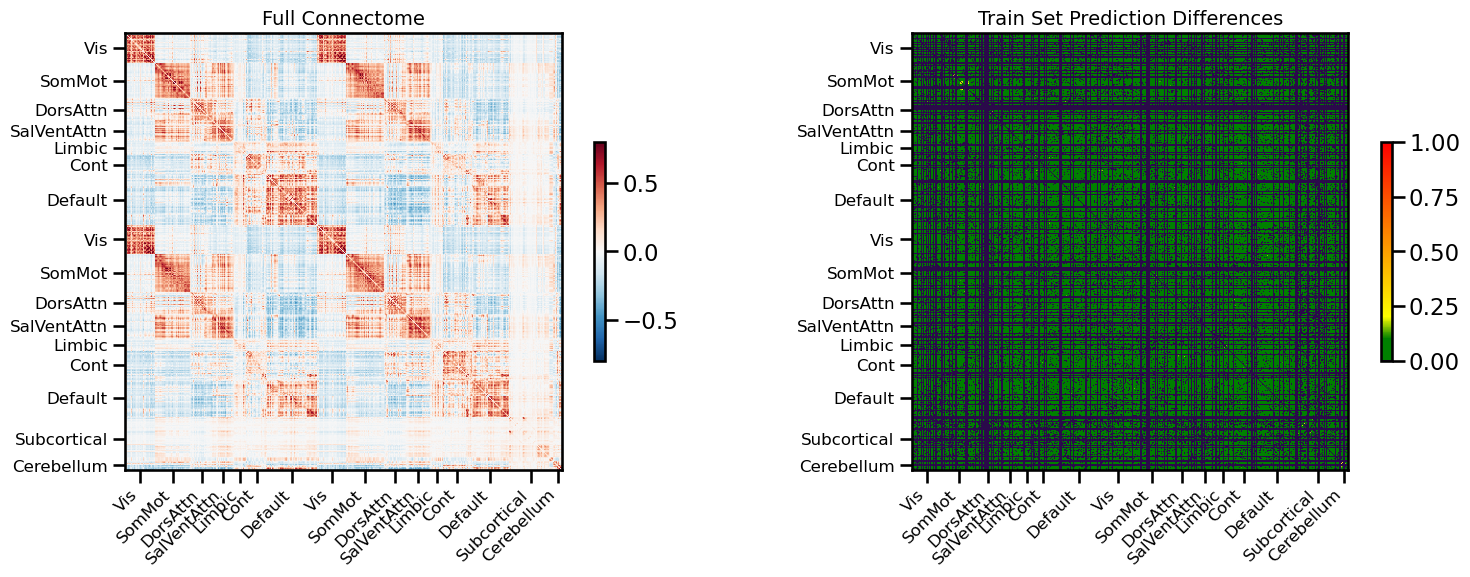

<Figure size 640x480 with 0 Axes>

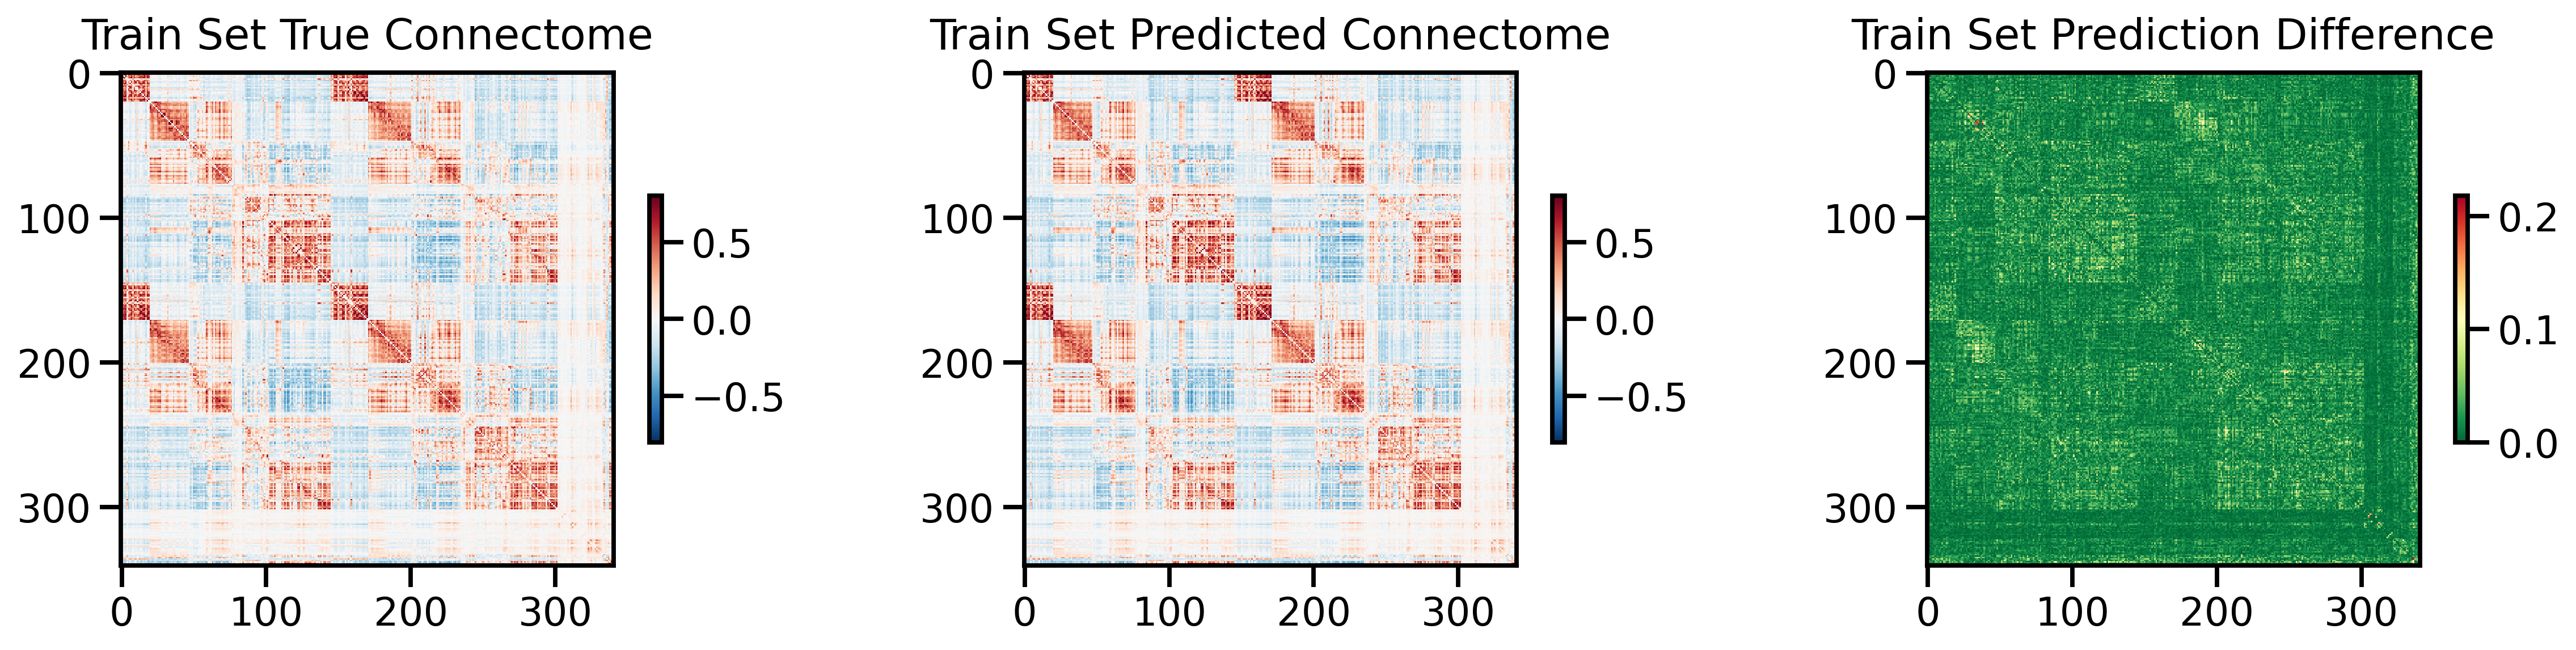

<Figure size 640x480 with 0 Axes>

Running test evaluation...

=== TEST EVALUATION ===
Evaluating 114 regions, 12882 connections


<Figure size 640x480 with 0 Axes>

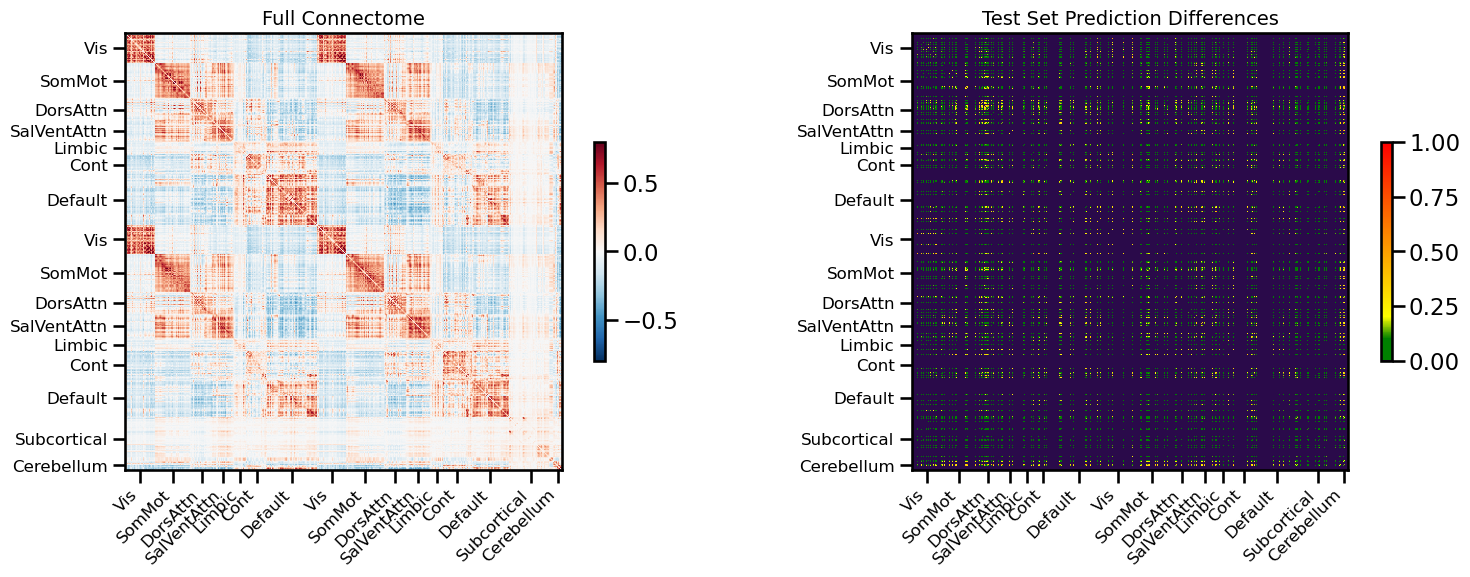

<Figure size 640x480 with 0 Axes>

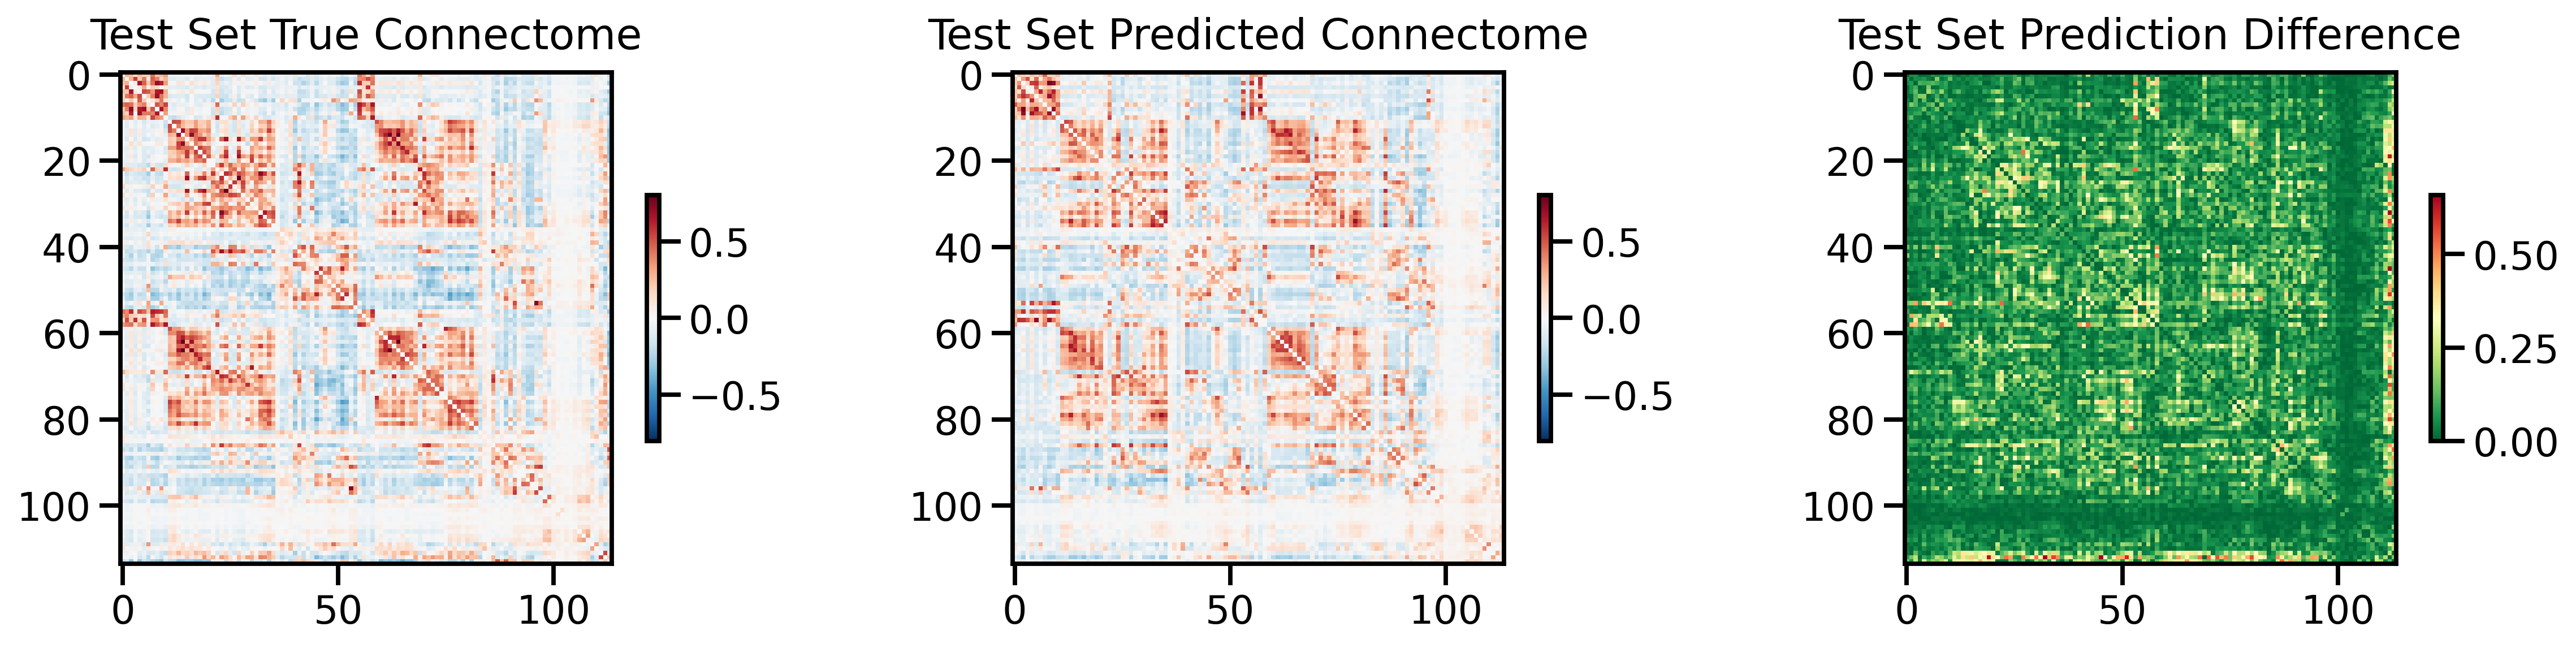

<Figure size 640x480 with 0 Axes>

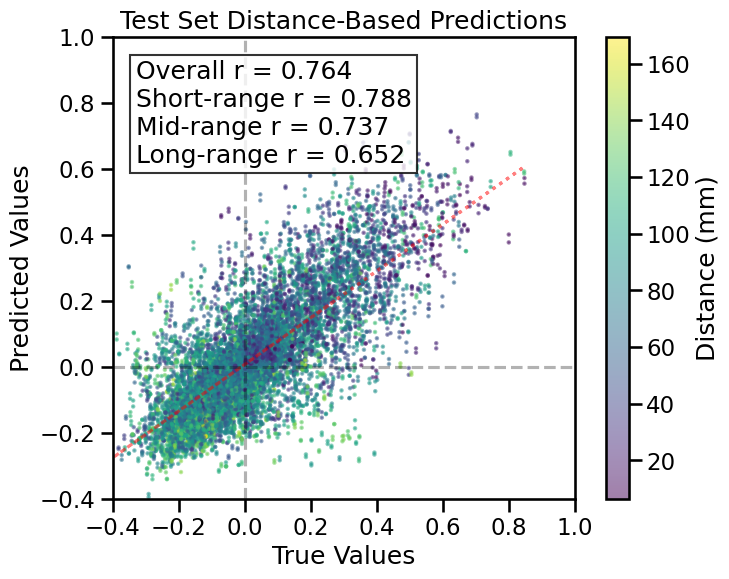

TRAIN METRICS
GLOBAL: mse=0.000569, mae=0.017939, r2=0.9832, pearson_r=0.9929, spearman_r=0.9899, geodesic_distance=12.1883
DISTANCE-BASED: short=0.9929, mid=0.9925, long=0.9919
HEMISPHERIC: left=0.9919, right=0.9935, inter=0.9932
CONNECTION STRENGTH: neg=0.8745, weak=0.9869, pos=0.9541
NETWORK CORRELATIONS:
  NETWORK      INTRA      INTER
  ------------------------------
  Cont          0.9918    0.9922
  Default       0.9886    0.9912
  SalVentAttn    0.9862    0.9917
  Limbic        0.9913    0.9926
  DorsAttn      0.9936    0.9937
  SomMot        0.9946    0.9933
  Vis           0.9955    0.9945
  Subcortical    0.9893    0.9917
  Cerebellum    0.9904    0.9910

TEST METRICS
GLOBAL: mse=0.014462, mae=0.083576, r2=0.5583, pearson_r=0.7643, spearman_r=0.7290, geodesic_distance=10.1088
DISTANCE-BASED: short=0.7884, mid=0.7367, long=0.6524
HEMISPHERIC: left=0.7497, right=0.8093, inter=0.7604
CONNECTION STRENGTH: neg=-0.0424, weak=0.6643, pos=0.4423
NETWORK CORRELATIONS:
  NETWORK      

  from IPython.core.display import HTML, display  # type: ignore



Final evaluation metrics logged successfully.
CPU Usage: 2.1%
RAM Usage: 9.6%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  1% |
Sim complete
Simulation completed in 625.67 seconds (10.43 minutes)


13183

<Figure size 640x480 with 0 Axes>

In [10]:
    single_sim_run(
                  feature_type=[{'transcriptome': None}],
                  train_shared_regions=False,
                  test_shared_regions=False,
                  omit_subcortical=False,
                  dataset='UKBB',
                  parcellation='S456',
                  hemisphere='both',
                  connectome_target='FC',
                  binarize=None,
                  impute_strategy='mirror_interpolate',
                  sort_genes='refgenome',
                  gene_list='0.2',
                  cv_type='random',
                  random_seed=42,
                  search_method=('wandb', 'mse', 5),
                  track_wandb=True,
                  skip_cv=True,
                  model_type='shared_transformer_pool',
                  use_gpu=True,
                  null_model='none',
                  use_folds=[0]
                  )
    
    # Clear GPU memory
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
    
    # Clear CPU memory
    gc.collect()

In [11]:
single_sim_run(
              feature_type=[{'transcriptome': None}],
              train_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              dataset='UKBB',
              parcellation='S456',
              hemisphere='both',
              connectome_target='FC',
              binarize=None,
              impute_strategy='mirror_interpolate',
              sort_genes='refgenome',
              gene_list='0.2',
              cv_type='random',
              random_seed=42,
              search_method=('wandb', 'mse', 4),
              track_wandb=True,
              skip_cv=True,
              model_type='shared_transformer_cls_pool',
              use_gpu=True,
              null_model='none',
              use_folds=[0]
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Clear CPU memory
gc.collect()

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
X_cell_types_Jorstad shape: (455, 24)
X_cell_types_LakeDFC shape: (455, 18)
X_cell_types_LakeVIS shape: (455, 18)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name: transcriptome, processing_type: None
features ['transcriptome']
Feature matrix, X, generated... expanding to pairwise dataset


wandb: WARNING Malformed sweep config detected! This may cause your sweep to behave in unexpected ways.
wandb: WARNING To avoid this, please fix the sweep config schema violations below:
wandb: WARNING   Violation 1. Additional properties are not allowed ('best_parameters' was unexpected)


Create sweep with ID: 6ai8xkqo
Sweep URL: https://wandb.ai/alexander-ratzan-new-york-university/gx2conn/sweeps/6ai8xkqo
Initialized sweep with ID: 6ai8xkqo


  warnings.warn(

  self.comm = Comm(**args)

  from IPython.core.display import HTML, display  # type: ignore



2
3
4
BEST CONFIG {'input_dim': 14760, 'token_encoder_dim': 20, 'd_model': 128, 'encoder_output_dim': 10, 'use_alibi': True, 'nhead': 4, 'num_layers': 4, 'deep_hidden_dims': [512, 256, 128], 'cls_init': 'spatial_learned', 'transformer_dropout': 0.1, 'dropout_rate': 0.1, 'learning_rate': 1e-05, 'weight_decay': 1e-05, 'batch_size': 1024, 'aug_prob': 0.3, 'epochs': 100, 'num_workers': 2, 'prefetch_factor': 4}
Number of learnable parameters in SMT w/ CLS pooled model: 1032194


  from IPython.core.display import display



  from IPython.core.display import HTML, display  # type: ignore



Using device: cuda
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.14 GB
Best val loss so far at epoch 1: 0.1039
Best val loss so far at epoch 2: 0.0686
Best val loss so far at epoch 4: 0.0564
Best val loss so far at epoch 5: 0.0563
Epoch 5/100, Train Loss: 0.0934, Val Loss: 0.0563, Time: 10.37s
Best val loss so far at epoch 7: 0.0542
Best val loss so far at epoch 9: 0.0521
Best val loss so far at epoch 10: 0.0484
Epoch 10/100, Train Loss: 0.0720, Val Loss: 0.0484, Time: 10.15s
Best val loss so far at epoch 12: 0.0480
Epoch 15/100, Train Loss: 0.0646, Val Loss: 0.0491, Time: 10.19s
Best val loss so far at epoch 16: 0.0387
Epoch 20/100, Train Loss: 0.0609, Val Loss: 0.0444, Time: 10.11s
Best val loss so far at epoch 22: 0.0386
Best val loss so far at epoch 24: 0.0341
Epoch 25/100, Train Loss: 0.0559, Val Loss: 0.0344, Time: 10.07s


KeyboardInterrupt: 